# CESMD Bridge Data Inventory

## From CESMD Records Web Services 

Metadata builder
https://www.strongmotioncenter.org/wserv/records/builder/

JSON URL (CSMIP (CE) Bridge Stations, including inactive stations and grouped by station)
https://www.strongmotioncenter.org/wserv/records/query?netid=CE&sttype=Br&abandoned=true&orderby=epidist-asc&rettype=metadata&format=json&groupby=station&nodata=404

STATIONS https://www.strongmotioncenter.org/wserv/stations/query?sttype=Br&format=json&nodata=404

RECORDS https://www.strongmotioncenter.org/wserv/records/query?netid=CE&orderby=epidist-asc&rettype=metadata&format=json&groupby=station&nodata=404

API Documentation
https://www.strongmotioncenter.org/wserv/records/documentation/

![JSON builder](./Figures/CESMD_Records_json_builder.png)

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

## Dataset

In [2]:
with open("CESMDBridges.json", "r") as readfile:
    bridge_metadata = json.load(readfile)
bridge_metadata

{'details': {'status': 200,
  'url': 'https://www.strongmotioncenter.org/wserv/records/query?netid=CE&sttype=Br&abandoned=true&orderby=epidist-asc&rettype=metadata&format=json&groupby=station&nodata=404'},
 'count': 358,
 'results': {'stations': [{'code': '01336',
    'network': 'CE',
    'status': None,
    'channels': 32,
    'recorder_type': None,
    'numRecorders': 8,
    'name': 'El Centro - Hwy8/Meloland Overpass',
    'location': 'ElCentro-MeloBr',
    'longitude': -115.4481,
    'latitude': 32.7735,
    'elevation': '-4',
    'type': 'Bridge',
    'Vs30': 265,
    'siteclass': 'D',
    'events': [{'id': 'ci3352060',
      'cesmd_id': 'ImperialValley79',
      'mag': 6.6,
      'longitude': -115.359,
      'latitude': 32.667,
      'depth': 15,
      'place': 'Imperial Valley, CA',
      'time': '1979-10-15 23:16:00',
      'state': 'CA',
      'country': 'US',
      'detail': '6.6 ML, 16:16:00 PDT, 32.67N 115.36W Depth 15.0 km',
      'net': 'ci',
      'magType': 'Ml',
      

In [93]:
bridge_inventory = {
    station['code']: {'name': station['name'],
                      'longitude': station['longitude'],
                      'latitude': station['latitude'],
                      'number of channels': station['channels'],
                      'number of events': len(station['events']),
                      'max magnitude': max([event['mag'] for event in station['events']]),
                      'max PGA': max([event['record']['pgav1'] for event in station['events'] if event['record']['pgav1'] is not None], default=0),
                      'max PSA': max([event['record']['pga_str'] for event in station['events'] if event['record']['pga_str'] is not None], default=0),
                      'min fault distance': min([event['record']['fault_dist'] for event in station['events'] if event['record']['fault_dist'] is not None], default=999),
                      'min epicentral distance': min([event['record']['epidist'] for event in station['events'] if event['record']['epidist'] is not None], default=999)
                      }
                    for station in bridge_metadata['results']['stations']
                    if len(station['events']) >= 5 and station['code'] not in ['24689','25749','57595','58657','68065','76741']
}
len(bridge_inventory)

23

In [94]:
bridge_table = pd.DataFrame(bridge_inventory).transpose()
bridge_table

,name,longitude,latitude,number of channels,number of events,max magnitude,max PGA,max PSA,min fault distance,min epicentral distance
01336,El Centro - Hwy8/Meloland Overpass,-115.4481,32.7735,32,14,7.2,0.318,0.509,33.4,18.5
13705,Corona - I15/Hwy91 Interchange Bridge,-117.5497,33.882,9,5,5.4,0.162,0.404,999,21.3
13795,Capistrano Beach - I5/Via Calif. Bridge,-117.6674,33.4659,12,5,7.2,0.041,0.093,205.4,55
14406,Los Angeles - Vincent Thomas Bridge,-118.2715,33.7494,26,7,7.2,0.25,0.65,51.9,21.9
23631,San Bernardino - I10/215 Interchange Br,-117.2962,34.065,36,9,7.3,0.18,1.02,80.7,4.7
24704,Los Angeles - I10/La Cienega Bridge,-118.3762,34.0368,15,5,7.1,0.095,0.122,188.2,14.9
24706,Palmdale - Hwy 14/Barrel Springs Bridge,-118.1301,34.5463,9,6,7.1,0.027,0.092,127.3,56.4
24775,Grapevine - I5/Lebec Rd Bridge,-118.8836,34.8663,16,6,7.1,0.058,0.041,143.4,7.4
33742,Ridgecrest - Hwy 395/Brown Road Bridge,-117.8187,35.6696,9,6,7.1,0.243,0.604,21.8,22.7
47315,San Juan Bautista - Hwy 101/156 Overpass,-121.5796,36.8619,15,10,6.9,0.24,0.94,999,3.5


## Visualize Data

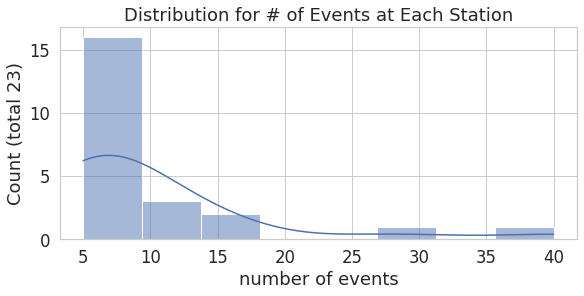

In [95]:
# Distribution for # of Events at Each Station
fig, ax = plt.subplots(figsize = (8,4), constrained_layout=True)
sns.histplot(bridge_table['number of events'], kde=True)
plt.ylabel(f'Count (total {len(bridge_inventory)})')
plt.title('Distribution for # of Events at Each Station');

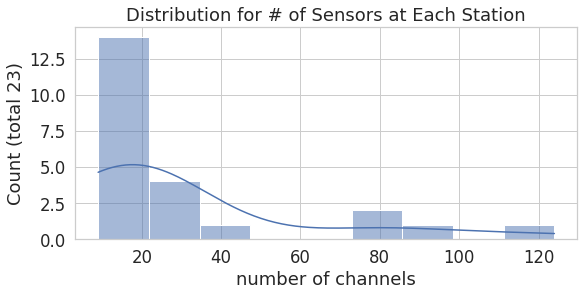

In [96]:
# Distribution for # of Sensors at Each Station
fig, ax = plt.subplots(figsize = (8,4), constrained_layout=True)
sns.histplot(bridge_table['number of channels'], kde=True)
plt.ylabel(f'Count (total {len(bridge_inventory)})')
plt.title('Distribution for # of Sensors at Each Station');

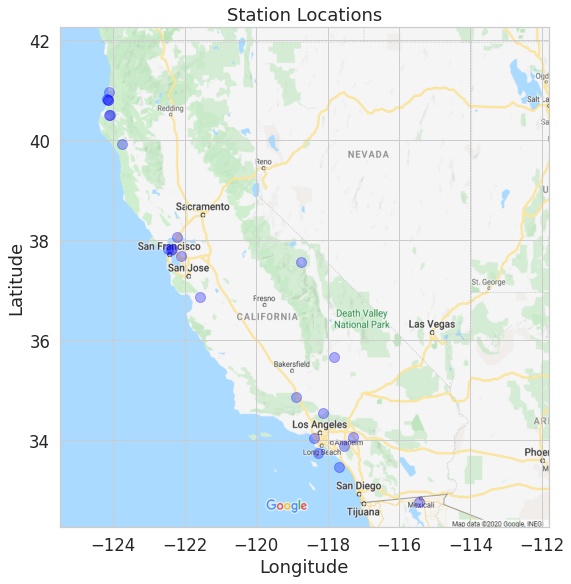

In [97]:
# Make a map of the bridge locations

# Map Boundaries
# map_bound = ((-178.8, -64.5, 17.7, 71.8)) # US map boundaries
map_bound = (-125.5, -111.8, 32.26, 42.27) # CA map boundaries

# Read in the base map and setting up subplot
basemap = plt.imread('Figures/CA.png')
# plt.rc('font', family='Liberation Sans')
# plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize = (10,8), constrained_layout=True)
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Plot the bridge locations
longitudes = [station['longitude'] for station in bridge_inventory.values()]
latitudes = [station['latitude'] for station in bridge_inventory.values()]
brg_plot = plt.scatter(longitudes, latitudes, c='blue', alpha=0.3, s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Station Locations')

# Setting aspect ratio and plotting the locations on top of the base map layer
ax.imshow(basemap, zorder=0, extent=map_bound, aspect=1.4);

In [98]:
# Check minimum and maximum coordinates for bridges in Building Metadata
print("Coordinate min and max:", [min(longitudes), max(longitudes), min(latitudes), max(latitudes)])

Coordinate min and max: [-124.1697, -115.4481, 32.7735, 40.9563]
